Capstone 1: Video Game Sales Analysis

For my first capstone project, I'll be analysing the vgsales.csv dataset from https://www.kaggle.com/datasets/gregorut/videogamesales?resource=download. As someone who has enjoyed games since I was a kid, I'm hoping to take my analysis skills and experience into a video game analyst role of some type. While this data isn't necessarily representative of what may be seen of an active online or mobile game, I feel it is a great way to dig into data that shows the types of games that are succesful, what genres are most popular, and more.

The file vgsales.csv, which is a list of video games with sales greater than 100,000 copies, features various data points including the title of the game, year of release, the platform(s) the title was released on, the genre of the game, and sales data by region as well as globally.

With this data set, I believe there is vital information that can help a developer determine how successful a potential game could be under specific circumstances. With that in mind, there are a few hypotheses I'm hoping to find and answer for.

As we all know, the type of video games people enjoy varies greatly not just from person to person, but geographically due to societal factors, as well as other factors like brand loyalty, adoption rate, and more. With this in mind, I'm hoping to provide insights to a developer regarding:

 - What genre of games were most successful (both regionally and globally) based on the historical sales data provided
 - What platforms were specific genres most likely to succeed and be profitable on
 - Which regions contributed the most in sales of each genre

With these questions in mind, let's begin by reading our data and getting a Data Frame setup to manipulate and manage the dataset.

In [157]:
# Importing pandas, matplotlib, and numpy libraries to manage dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Creating dataframe from vgsales.csv
df = pd.read_csv('vgsales.csv')

# Identifying the size of our dataset
print(df.shape)

# Printing the column names for reference
for col in df:
    display(col)

(16598, 11)


'Rank'

'Name'

'Platform'

'Year'

'Genre'

'Publisher'

'NA_Sales'

'EU_Sales'

'JP_Sales'

'Other_Sales'

'Global_Sales'

The file is fairly large, with 11 columns and 16,598 rows of data, bringint the total number of data points to 182,578. This is a fairly small dataset, but with over 16,500 invdividual games listed on this file, it probably won't help to display the file in its entirety here.

For this analysis, aside from certain instances the title isn't necessarily critical at this point. So let's ignore this and dig into sales data, answering the question of what genre of game is most successful based on the sales data we have.

We'll break this out both by region as well as globally via a data frame table and a bar chart for added clarity.

,Genre,NA_Sales_by_Millions,EU_Sales_by_Millions,JP_Sales_by_Millions,Other_Sales_by_Millions,Global_Sales_by_Millions
0,Action,877.83,525.00,159.95,187.38,1751.18
1,Adventure,105.80,64.13,52.07,16.81,239.04
2,Fighting,223.59,101.32,87.35,36.68,448.91
3,Misc,410.24,215.98,107.76,75.32,809.96
4,Platform,447.05,201.63,130.77,51.59,831.37
5,Puzzle,123.78,50.78,57.31,12.55,244.95
6,Racing,359.42,238.39,56.69,77.27,732.04
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
8,Shooter,582.60,313.27,38.28,102.69,1037.37
9,Simulation,183.31,113.38,63.70,31.52,392.20


<Axes: title={'center': 'Sales by Genre per Region'}, xlabel='Genre'>

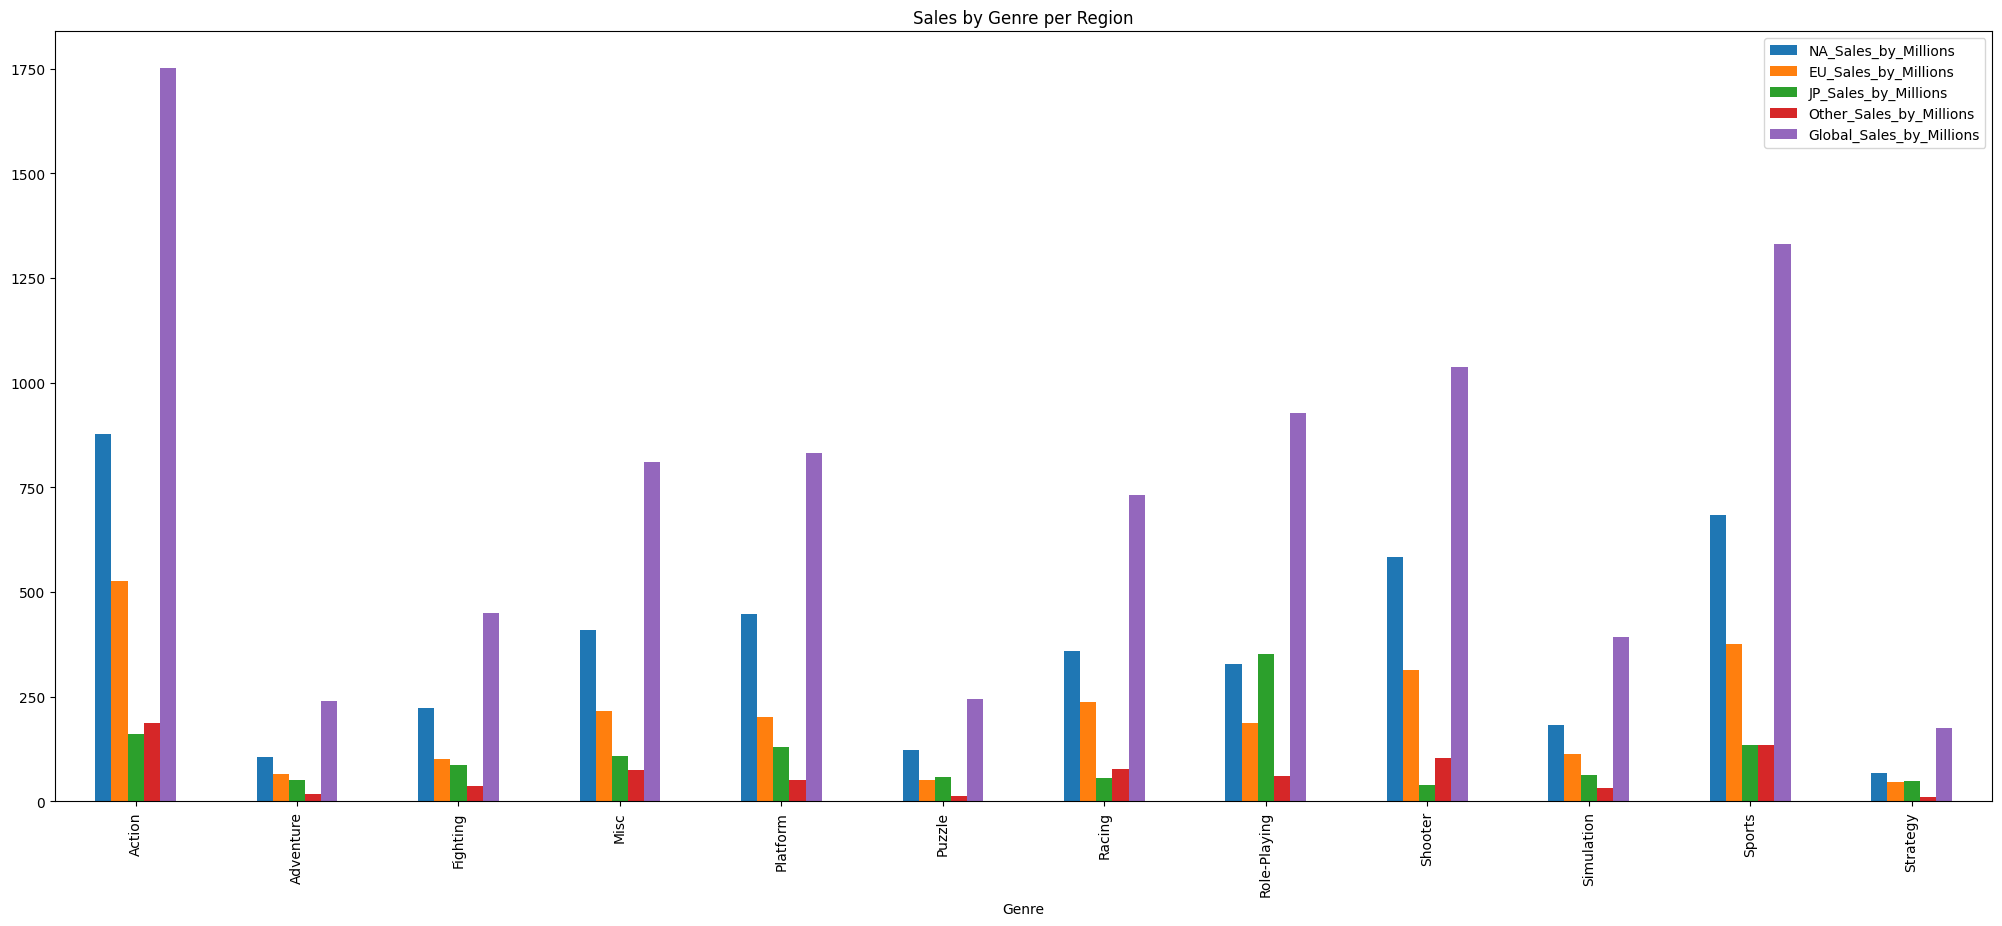

In [191]:
# Creating dataframe of genre and sales numbers, renaming columns for clarity
vg_sales = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().reset_index()
vg_sales.rename(columns={'NA_Sales': 'NA_Sales_by_Millions','EU_Sales': 'EU_Sales_by_Millions', \
                        'JP_Sales': 'JP_Sales_by_Millions','Other_Sales': 'Other_Sales_by_Millions', \
                        'Global_Sales': 'Global_Sales_by_Millions' }, inplace=True)

# Displaying sales data
display(vg_sales)

# Creating a grouped bar chart of sales by genre and region
vg_sales.plot(x='Genre',
              figsize=(25,10),
              kind='bar',
              stacked=False,
              title='Sales by Genre per Region')

Based on the sales numbers we have, Action games are by far the best selling titles historically, with a whopping $1.75 billion in total sales. Sports games come in a far second, with just over $1.25 billion in sales, and Shooters come in third with just over $1 billion total sales.

So, if you really want to make money as a developer, creating an action game of some type is your probably your best bet. While this doesn't guarantee success, and other factors like marketing and the games appeal to the audiance, it's a compass that points in the right direction for success.

What this data also tells us is that for the most part, the spread of sales across genres throughout each region follows a pattern. North America is where most of the sales of a game will occur for almost all genres, with the exception of Role-Playing games, which are more successful in Japan.

So, we know North America has the largest target audience to shoot for, but just how much can it potentially contribute to a game's total sales?

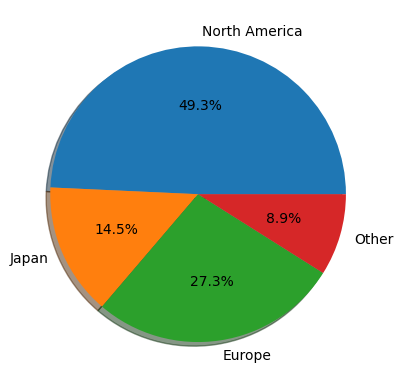

In [171]:
# Assign each regions sales to variable, then create array and pie chart with the data
na_sales = vg_sales['NA_Sales_by_Millions'].sum()
jp_sales = vg_sales['JP_Sales_by_Millions'].sum()
eu_sales = vg_sales['EU_Sales_by_Millions'].sum()
ot_sales = vg_sales['Other_Sales_by_Millions'].sum()

global_pie = np.array([na_sales, jp_sales, eu_sales, ot_sales])
global_labels = ["North America","Japan","Europe", "Other"]

# Create pie chart detailing percentages of sales from each region
plt.pie(global_pie,
        shadow=True,
        labels = global_labels,
        autopct='%1.1f%%')
plt.show()

Breaking the sales data out into a pie chart, we can see that North America contributes essentially half of the total global sales of games overall. This is a huge piece of the pie, and is most likely due to population size, and the percentage of people that purchase games in this region.

While we don't have the exact numbers of just how much of the population does this, our pie chart does give us a good idea of just how much of the global audience is located here. From a marketing standpoint, it would be absolutely critical to push a game here with ads.

So, we've learned that North America specifically is where a game will get most of it's sales from.

Now, let's take a look at platforms and see which ones were the most successful to release on.

In [132]:
# Creating dataframe of platform and sales numbers, renaming columns for clarity
vg_sales_pf = df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().reset_index()
vg_sales_pf.rename(columns={'NA_Sales': 'NA_Sales_by_Millions','EU_Sales': 'EU_Sales_by_Millions', \
                        'JP_Sales': 'JP_Sales_by_Millions','Other_Sales': 'Other_Sales_by_Millions', \
                        'Global_Sales': 'Global_Sales_by_Millions' }, inplace=True)

display(vg_sales_pf)

,Platform,NA_Sales_by_Millions,EU_Sales_by_Millions,JP_Sales_by_Millions,Other_Sales_by_Millions,Global_Sales_by_Millions
0,2600,90.60,5.47,0.00,0.91,97.08
1,3DO,0.00,0.00,0.10,0.00,0.10
2,3DS,78.87,58.52,97.35,12.63,247.46
3,DC,5.43,1.69,8.56,0.27,15.97
4,DS,390.71,194.65,175.57,60.53,822.49
5,GB,114.32,47.82,85.12,8.20,255.45
6,GBA,187.54,75.25,47.33,7.73,318.50
7,GC,133.46,38.71,21.58,5.18,199.36
8,GEN,19.27,5.52,2.67,0.89,28.36
9,GG,0.00,0.00,0.04,0.00,0.04


With over 30 different platforms in this data set, the answer gets a little convoluted. So, let's break it down to the top 10 platforms and see how things look.

This an help us pinpoint which consoles were the most popular platforms, as well as provide more insights as to why the games released on them were so successful.

,Platform,Global_Sales_by_Millions
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


<Axes: title={'center': 'Sales by Genre per Region'}, xlabel='Platform'>

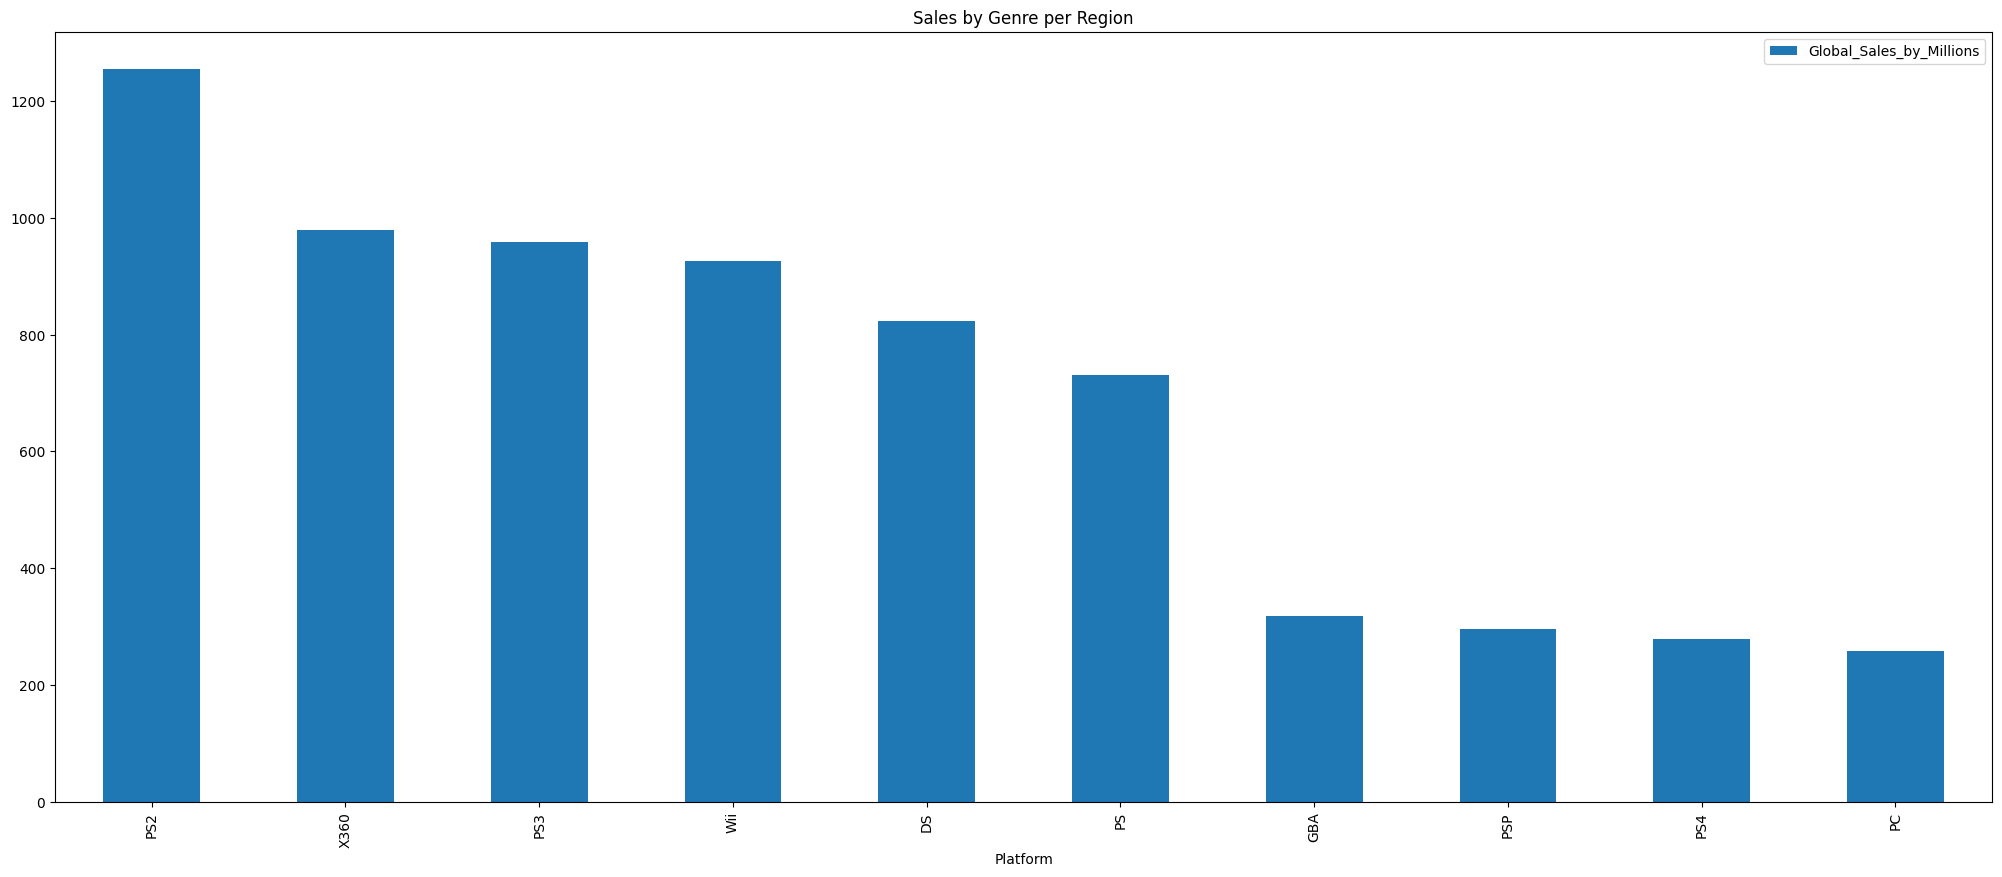

In [175]:
# Creating a dataframe of the top 10 platform by sales
vg_sales_pf10 = vg_sales_pf.nlargest(10,'Global_Sales_by_Millions')

vg_spf10_df = pd.DataFrame(vg_sales_pf10[['Platform','Global_Sales_by_Millions']])

display(vg_spf10_df)

# Creating a grouped bar chart of top 10 platform by global sales
vg_spf10_df.plot(x='Platform',
              figsize=(25,10),
              kind='bar',
              stacked=False,
              title='Sales by Genre per Region')

Of the top 10 consoles, 50% of the sales went to Sony's platforms:

- $1.2 billion went towards the Playstation 2
- $957 million went towards the Playstation 3
- $730 million went towards the Playstation 1
- $297 million went towards the PSP handheld
- $279 million went towards the Playstation 4

Historically, Sony has seen the most sales overall across all of its consoles. Specifically, we know that the PlayStation 2 has seen the most success in terms of historical sales.

So let's break down what each genre contributed to this success by taking a look at the global sales of each one on this console.

,Genre,Global_Sales
0,Action,272.76
1,Adventure,21.16
2,Fighting,92.60
3,Misc,101.14
4,Platform,72.51
5,Puzzle,5.90
6,Racing,156.28
7,Role-Playing,93.50
8,Shooter,108.57
9,Simulation,42.66


<Axes: title={'center': 'Sales by Genre on PS2'}, xlabel='Genre'>

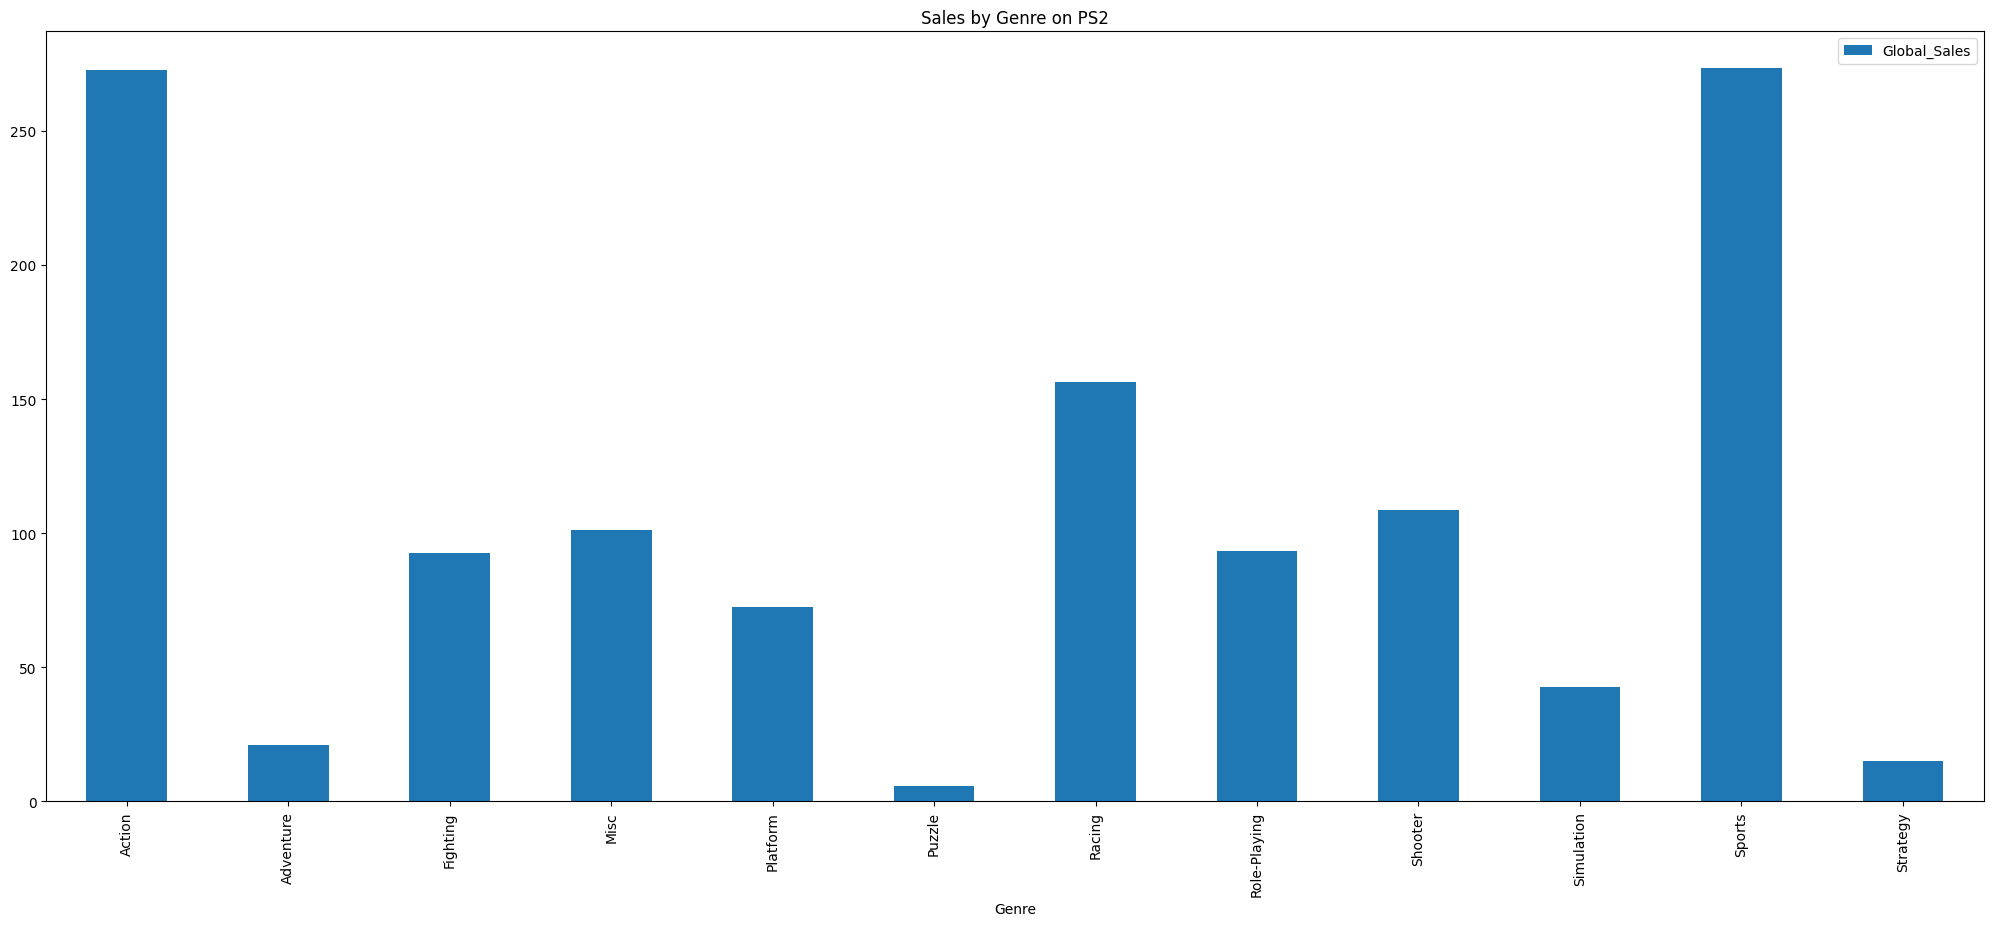

In [192]:
# Create a dataframe with PS2 specific data, specifically genres and sales date
ps2_df = df[(df['Platform'] == 'PS2')]
ps2_sales_data = ps2_df.groupby('Genre')[['Global_Sales']].sum().reset_index()

display(ps2_sales_data)

# Creating a grouped bar chart of sales by genre on PS2
ps2_sales_data.plot(x='Genre',
               figsize=(25,10),
               kind='bar',
               stacked=False,
               title='Sales by Genre on PS2')

As we can see, Action and Sports games were the leading genres on Sony's PlayStation 2. This aligns pretty much with our initial findings that these two genres were the most popular, and points to the fact that these two genres contribute a large part of global sales, not just for Sony's platforms, but for all of them.

So, after digging into the dataset, we were able get an answer to our hypotheses:

 - What genre of games were most successful (both regionally and globally) based on the historical sales data provided?

 Action games and Sports games are by far the most popular globally.

 - What platforms were games and specific genres most likely to succeed and be profitable on?

Sony consoles were the lion's share of global sales historically, and the Playstation 2 (which is the best selling console of all time) contriibutes greatly to this.

 - Which regions contributed the most in sales of each genre

 With the exception of Role-Playing games in the Japanese market, the North American market is the largest contributor of each genres sales.